In [1]:
from autometrics.dataset.datasets import Primock57
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Primock57(path='./autometrics/dataset/datasets/primock57/metric-scores.csv')

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42)

In [4]:
# llama31_70b = dspy.HFClientVLLM(
#     model="meta-llama/Meta-Llama-3.1-70b-Instruct",
#     port=7410,
#     url="http://future-hgx-1",
#     max_tokens=512,
#     stop=["\n---", "\n\n", "<|eot_id|><|start_header_id|>assistant"],
#     model_type="chat"
# )

# llama31_70b.kwargs["max_tokens"] = 512
# llama31_70b.kwargs['stop'] = ["\n---", "\n\n", "<|eot_id|><|start_header_id|>assistant"]

llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Write a high quality clinical note based on the transcript of a consultation with a patient.", proposer_model=llama31_70b, judge_api_base="http://jagupard36:8000/v1")

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [7]:
new_metrics_group = []
for target_column in dataset.target_columns:
    new_metrics_group.append(generator.generate(train, target_column))
    for metric in new_metrics_group[-1]:
        metric.display()

,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Organization and structure**: The model should organize the extracted information in a clear and concise manner, using a logical structure and headings to separate different sections of the note.","A score of 1 indicates that the note is poorly organized and lacks a clear structure. The information is presented in a disjointed and confusing manner, making it difficult to understand the patient's symptoms and medical history.","A score of 2 indicates that the note has some organizational issues, but the information is still presented in a somewhat logical manner. The note may lack clear headings or section dividers, but the reader can still follow the narrative and understand the patient's symptoms and medical history.","A score of 3 indicates that the note is adequately organized, with clear headings and section dividers. The information is presented in a logical order, but the note may lack some detail or clarity in certain sections.","A score of 4 indicates that the note is well-organized, with clear and concise headings and section dividers. The information is presented in a logical order, and the note provides a clear and detailed picture of the patient's symptoms and medical history.","A score of 5 indicates that the note is exceptionally well-organized, with clear and concise headings and section dividers. The information is presented in a logical order, and the note provides a comprehensive and detailed picture of the patient's symptoms and medical history."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance of information**: The model should prioritize extracting relevant information from the transcript, such as the patient's symptoms, medical history, and treatment plan.","A score of 1 indicates that the generated clinical note lacks relevant information, such as the patient's symptoms, medical history, and treatment plan. The note may contain irrelevant details or fail to capture the essential points discussed during the consultation.","A score of 2 indicates that the generated clinical note contains some relevant information, but it is incomplete or inaccurate. The note may miss important details, such as the patient's symptoms or medical history, or contain errors in the treatment plan.","A score of 3 indicates that the generated clinical note contains most of the relevant information, but it may lack some important details. The note may accurately capture the patient's symptoms and medical history, but may not fully detail the treatment plan or contain some minor errors.","A score of 4 indicates that the generated clinical note contains all the relevant information, but it may not be fully accurate or complete. The note may accurately capture the patient's symptoms, medical history, and treatment plan, but may contain some minor errors or omissions.","A score of 5 indicates that the generated clinical note is highly relevant and accurate, containing all the essential information discussed during the consultation. The note accurately captures the patient's symptoms, medical history, and treatment plan, and is free of errors."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity and concision of writing**: The model should use clear and concise language to convey the information, avoiding ambiguity and unnecessary complexity.","A score of 1 indicates that the writing is unclear, ambiguous, and difficult to understand. The language is complex, and the sentences are long and convoluted. The writer fails to convey the intended meaning, and the reader must make significant effort to decipher the text.","A score of 2 indicates that the writing is somewhat unclear and lacks concision. The language is formal, but the sentences are often long and wordy. The writer conveys some information, but the reader must still make an effort to understand the intended meaning.","A score of 3 indicates that the writing is clear and concise, but may lack some precision. The language is straightforward, and the sentences are generally well-structured. The writer conveys the intended meaning, but may use some unnecessary words or phrases.","A score of 4 indicates that the writing is clear, concise, and precise. The language is simple and direct, and the sentences are well-structured and easy to follow. The writer conveys the intended meaning with minimal effort required from the reader.","A score of 5 indicates that the writing is exceptionally clear, concise, and precise. The language is elegant and engaging, and the sentences are well-crafted and easy to follow. The writer conveys the intended meaning with ease, and the reader can quickly and easily understand the text."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Completeness of information**: The model should aim to include all relevant information from the transcript, without omitting important details or including unnecessary information.","A score of 1 indicates that the model has failed to include any relevant information from the transcript, or has included only very minor details that are not useful for diagnosis or treatment.","A score of 2 indicates that the model has included some relevant information from the transcript, but has omitted important details or included unnecessary information. The model may have captured some of the patient's symptoms or medical history, but has not provided a complete picture.","A score of 3 indicates that the model has included most of the relevant information from the transcript, but may have omitted some minor details or included some unnecessary information. The model has provided a good overview of the patient's symptoms and medical history, but may not have captured every detail.","A score of 4 indicates that the model has included almost all of the relevant information from the transcript, with only very minor omissions or unnecessary inclusions. The model has provided a comprehensive overview of the patient's symptoms and medical history, and has captured most of the important details.","A score of 5 indicates that the model has included all of the relevant information from the transcript, without omitting any important details or including unnecessary information. The model has provided a complete and accurate picture of the patient's symptoms and medical history, and has captured every important detail."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy of information**: The model should strive to accurately represent the information from the transcript, without introducing errors or inaccuracies.","A score of 1 indicates that the model has failed to accurately represent the information from the transcript, with significant errors or inaccuracies present.","A score of 2 indicates that the model has partially accurately represented the information from the transcript, but with some errors or inaccuracies present.","A score of 3 indicates that the model has mostly accurately represented the information from the transcript, with only minor errors or inaccuracies present.","A score of 4 indicates that the model has very accurately represented the information from the transcript, with only very minor errors or inaccuracies present.","A score of 5 indicates that the model has perfectly accurately represented the information from the transcript, with no errors or inaccuracies present."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity and concision**: The fifth most important axis of variation is the clarity and concision of the clinical note. A good clinical note should be clear and concise, and it should avoid unnecessary information.","A score of 1 indicates that the clinical note is unclear and lacks concision. The note may contain irrelevant information, be poorly organized, or use ambiguous language, making it difficult for healthcare providers to understand the patient's condition and treatment plan.","A score of 2 indicates that the clinical note is somewhat clear but lacks concision. The note may contain some relevant information, but it may be poorly organized or contain unnecessary details, making it difficult for healthcare providers to quickly understand the patient's condition and treatment plan.","A score of 3 indicates that the clinical note is clear but could be more concise. The note may contain all the necessary information, but it may be somewhat lengthy or contain some unnecessary details, making it slightly difficult for healthcare providers to quickly understand the patient's condition and treatment plan.","A score of 4 indicates that the clinical note is clear and concise. The note contains all the necessary information, is well-organized, and uses clear language, making it easy for healthcare providers to quickly understand the patient's condition and treatment plan.","A score of 5 indicates that the clinical note is exceptionally clear and concise. The note is well-structured, contains only the most relevant information, and uses clear and concise language, making it extremely easy for healthcare providers to quickly understand the patient's condition and treatment plan."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance of information**: The most important axis of variation is the relevance of the information included in the clinical note. A good clinical note should include all the relevant information about the patient's symptoms, medical history, and treatment.","Score 1: The clinical note lacks relevant information about the patient's symptoms, medical history, and treatment. The note is incomplete, disorganized, and difficult to understand.","Score 2: The clinical note includes some relevant information about the patient's symptoms, medical history, and treatment, but it is incomplete or disorganized. The note may be missing important details or may be difficult to understand.","Score 3: The clinical note includes most of the relevant information about the patient's symptoms, medical history, and treatment. The note is generally well-organized, but may be missing some minor details.","Score 4: The clinical note includes all the relevant information about the patient's symptoms, medical history, and treatment. The note is well-organized, clear, and concise, making it easy for healthcare professionals to quickly understand the patient's condition and develop an appropriate treatment plan.","Score 5: The clinical note is exemplary, including all the relevant information about the patient's symptoms, medical history, and treatment. The note is extremely well-organized, clear, and concise, making it easy for healthcare professionals to quickly understand the patient's condition and develop an appropriate treatment plan."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Organization and structure**: The second most important axis of variation is the organization and structure of the clinical note. A well-structured clinical note is easy to read and understand, and it helps to identify the most important information quickly.","A score of 1 indicates that the clinical note lacks organization and structure. The note may be disorganized, with important information scattered throughout the text. The writer may not have used clear headings or sections to separate different types of information, making it difficult to quickly identify the most important details.","A score of 2 indicates that the clinical note has some organization and structure, but it is not consistent throughout the note. The writer may have used some headings or sections, but they may not be clear or consistent. The note may still be difficult to follow, and important information may be hard to find.","A score of 3 indicates that the clinical note has a clear organization and structure, but it may not be perfect. The writer may have used clear headings and sections, but there may be some minor errors or inconsistencies. The note is generally easy to follow, but there may be some areas where the organization could be improved.","A score of 4 indicates that the clinical note has a strong organization and structure. The writer has used clear and consistent headings and sections, making it easy to quickly identify the most important information. The note is well-organized and easy to follow, with minimal errors or inconsistencies.","A score of 5 indicates that the clinical note has an exceptional organization and structure. The writer has used clear and consistent headings and sections, and the note is extremely well-organized and easy to follow. The writer has also used effective formatting and layout to make the note easy to read and understand."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Use of medical terminology**: The third most important axis of variation is the use of medical terminology. A good clinical note should use accurate and relevant medical terminology to describe the patient's symptoms and treatment.,"A score of 1 indicates that the note lacks proper use of medical terminology. The language used is vague, and the note relies heavily on colloquialisms or layman's terms. This makes it difficult for healthcare professionals to understand the patient's condition and treatment.","A score of 2 indicates that the note uses some medical terminology, but it is inconsistent and often inaccurate. The language used is sometimes vague, and the note may rely on colloquialisms or layman's terms. While some medical terms are used, they may be misused or used out of context.","A score of 3 indicates that the note uses medical terminology, but it is not always accurate or relevant. The language used is mostly clear, but there may be some instances of vague or colloquial language. The note may use some medical jargon, but it is not excessive.","A score of 4 indicates that the note uses accurate and relevant medical terminology consistently throughout. The language used is clear and concise, and the note effectively communicates the patient's condition and treatment. However, there may be some minor errors or inconsistencies in the use of medical terminology.","A score of 5 indicates that the note uses accurate and relevant medical terminology consistently throughout, with no errors or inconsistencies. The language used is clear, concise, and professional, and the note effectively communicates the patient's condition and treatment."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Completeness of information**: The fourth most important axis of variation is the completeness of the information included in the clinical note. A good clinical note should include all the relevant information about the patient's symptoms, medical history, and treatment.","A score of 1 indicates that the clinical note is incomplete and lacks essential information about the patient's condition. The note may not include details about the patient's symptoms, medical history, or treatment plans, making it difficult for healthcare professionals to provide adequate care.","A score of 2 indicates that the clinical note is partially complete, but still lacks some important information about the patient's condition. The note may include some details about the patient's symptoms or medical history, but may not provide a comprehensive overview of the patient's condition.","A score of 3 indicates that the clinical note is mostly complete, but may still be missing some minor details about the patient's condition. The note provides a good overview of the patient's symptoms, medical history, and treatment plans, but may not include all relevant information.","A score of 4 indicates that the clinical note is complete and provides a thorough overview of the patient's condition. The note includes all relevant information about the patient's symptoms, medical history, allergies, medications, and treatment plans, making it easy for healthcare professionals to provide informed care.","A score of 5 indicates that the clinical note is exceptionally complete and provides a detailed and comprehensive overview of the patient's condition. The note includes all relevant information about the patient's symptoms, medical history, allergies, medications, and treatment plans, as well as additional details that may be relevant to the patient's care."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity**: The good examples are written in a clear and concise manner, making it easy to understand the information, whereas the bad examples may be unclear or confusing.","A score of 1 indicates that the generated clinical note is extremely unclear and difficult to understand. The note may be poorly organized, contain ambiguous language, or lack essential information. The reader may struggle to comprehend the patient's condition, symptoms, or treatment plan.","A score of 2 indicates that the generated clinical note is unclear and somewhat difficult to understand. The note may lack clarity in certain sections, contain some ambiguous language, or omit important details. The reader may need to re-read the note multiple times to grasp the patient's condition, symptoms, or treatment plan.","A score of 3 indicates that the generated clinical note is somewhat clear but could be improved. The note may be generally well-organized, but some sections may lack clarity or contain minor ambiguities. The reader may need to re-read certain parts of the note to fully understand the patient's condition, symptoms, or treatment plan.","A score of 4 indicates that the generated clinical note is clear and well-written. The note is well-organized, easy to follow, and free of major ambiguities. The reader can easily understand the patient's condition, symptoms, and treatment plan. However, there may be minor areas for improvement, such as slight rewording or reorganization.","A score of 5 indicates that the generated clinical note is extremely clear and well-written. The note is exceptionally well-organized, easy to follow, and free of any ambiguities. The reader can quickly and easily understand the patient's condition, symptoms, and treatment plan. The note is concise, accurate, and meets all the necessary standards for a high-quality clinical note."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Completeness**: The good examples tend to be more complete, with all the necessary information included, whereas the bad examples often lack important details.","A score of 1 indicates that the clinical note is severely incomplete, lacking essential information about the patient's condition, medical history, or treatment plan. The note may only include a brief summary of the patient's symptoms or a limited medical history, without providing any meaningful context or supporting details.","A score of 2 indicates that the clinical note is incomplete, missing some important information about the patient's condition, medical history, or treatment plan. The note may include some relevant details, but lacks critical information that would provide a comprehensive understanding of the patient's situation.","A score of 3 indicates that the clinical note is partially complete, including some relevant information about the patient's condition, medical history, and treatment plan. However, the note may still lack some important details or context, making it difficult to fully understand the patient's situation.","A score of 4 indicates that the clinical note is mostly complete, including most of the relevant information about the patient's condition, medical history, and treatment plan. The note may only lack a few minor details or supporting information, but overall provides a comprehensive understanding of the patient's situation.","A score of 5 indicates that the clinical note is highly complete, including all relevant information about the patient's condition, medical history, and treatment plan. The note provides a thorough and detailed understanding of the patient's situation, with all necessary information included."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy**: The good examples are more accurate, with correct information and no errors, whereas the bad examples may contain incorrect or misleading information.","A score of 1 indicates that the clinical note is inaccurate and contains significant errors or omissions. The note may not accurately reflect the patient's symptoms, medical history, or treatment plan.","A score of 2 indicates that the clinical note is partially accurate but contains some errors or omissions. The note may accurately reflect some aspects of the patient's symptoms, medical history, or treatment plan, but may not capture all relevant information.","A score of 3 indicates that the clinical note is generally accurate but may contain some minor errors or omissions. The note accurately reflects the patient's symptoms, medical history, and treatment plan, but may not capture all nuances or details.","A score of 4 indicates that the clinical note is highly accurate and contains only minor errors or omissions. The note accurately reflects the patient's symptoms, medical history, and treatment plan, and captures most nuances and details.","A score of 5 indicates that the clinical note is extremely accurate and contains no errors or omissions. The note accurately reflects the patient's symptoms, medical history, and treatment plan, and captures all nuances and details."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Organization**: The good examples are well-organized and easy to follow, whereas the bad examples may be disorganized or difficult to follow.","A score of 1 indicates that the note is extremely disorganized and difficult to follow. The structure is unclear, and the information is presented in a way that makes it hard to understand the patient's condition and treatment plan.","A score of 2 indicates that the note is somewhat disorganized, but still possible to follow. The structure is not entirely clear, and some information may be missing or presented in a way that is hard to understand.","A score of 3 indicates that the note is generally well-organized, but may have some minor issues with clarity or coherence. The structure is clear, and the information is presented in a way that is easy to understand, but there may be some minor errors or omissions.","A score of 4 indicates that the note is well-organized and easy to follow, with a clear structure and concise presentation of the patient's symptoms, medical history, and treatment plan. There may be some minor issues with clarity or coherence, but overall the note is well-written and easy to understand.","A score of 5 indicates that the note is extremely well-organized and easy to follow, with a clear and concise presentation of the patient's symptoms, medical history, and treatment plan. The structure is logical and easy to follow, and the information is presented in a way that is easy to understand."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance**: The good examples are relevant to the topic or task at hand, whereas the bad examples may be off-topic or irrelevant.","A score of 1 indicates that the generated clinical note is completely off-topic or irrelevant to the task. The note may not address the patient's symptoms or medical history, or it may be a generic template that does not provide any useful information.",A score of 2 indicates that the generated clinical note is somewhat relevant but lacks important details or context. The note may touch on the patient's symptoms or medical history but fails to provide a clear understanding of the patient's condition or treatment plan.,A score of 3 indicates that the generated clinical note is generally relevant but may contain some inaccuracies or omissions. The note may provide a good overview of the patient's symptoms and medical history but may not fully address the patient's condition or treatment plan.,"A score of 4 indicates that the generated clinical note is highly relevant and provides a clear understanding of the patient's symptoms, medical history, and treatment plan. The note may contain some minor errors or omissions but overall demonstrates a strong understanding of the task.","A score of 5 indicates that the generated clinical note is exceptionally relevant and provides a comprehensive and accurate understanding of the patient's symptoms, medical history, and treatment plan. The note is well-organized, clear, and concise, and demonstrates a deep understanding of the task."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Completeness**: The good examples are complete and detailed, while the bad examples are incomplete and lack detail.","A score of 1 indicates that the clinical note is severely incomplete, lacking essential information about the patient's condition, medical history, and treatment. The note may only include a brief summary of the patient's symptoms or a limited medical history, without providing any details about the treatment plan or medications.","A score of 2 indicates that the clinical note is incomplete, lacking some important information about the patient's condition, medical history, and treatment. The note may include some details about the patient's symptoms and medical history, but may omit information about the treatment plan or medications.","A score of 3 indicates that the clinical note is partially complete, providing some information about the patient's condition, medical history, and treatment. The note may include details about the patient's symptoms and medical history, but may lack information about the treatment plan or medications.","A score of 4 indicates that the clinical note is mostly complete, providing most of the necessary information about the patient's condition, medical history, and treatment. The note may include details about the patient's symptoms, medical history, and treatment plan, but may lack some minor information.","A score of 5 indicates that the clinical note is complete, providing all necessary information about the patient's condition, medical history, and treatment. The note includes detailed information about the patient's symptoms, medical history, treatment plan, and medications, making it a comprehensive and detailed account of the patient's care."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Structure**: The good examples are well-structured and easy to follow, while the bad examples are poorly structured and difficult to follow.","A score of 1 indicates that the clinical note is extremely poorly structured, making it difficult to understand the patient's condition, symptoms, and treatment plan. The note may lack essential information, and the formatting may be disorganized, making it hard to follow.","A score of 2 indicates that the clinical note is poorly structured, with some essential information missing or difficult to find. The formatting may be somewhat disorganized, but the note still provides some useful information about the patient's condition and treatment plan.","A score of 3 indicates that the clinical note is adequately structured, providing most of the essential information about the patient's condition, symptoms, and treatment plan. The formatting may be somewhat inconsistent, but the note is generally easy to follow.","A score of 4 indicates that the clinical note is well-structured, providing all the essential information about the patient's condition, symptoms, and treatment plan. The formatting is consistent and easy to follow, making it easy to understand the patient's condition and treatment plan.","A score of 5 indicates that the clinical note is extremely well-structured, providing all the essential information about the patient's condition, symptoms, and treatment plan in a clear and concise manner. The formatting is consistent and easy to follow, making it easy to understand the patient's condition and treatment plan."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance**: The good examples are relevant to the patient's condition and treatment, while the bad examples are not relevant or are only partially relevant.","Score 1: The generated note is completely irrelevant to the patient's condition and treatment. It does not address the patient's symptoms, medical history, or treatment plan.",Score 2: The generated note is partially relevant but lacks important details about the patient's condition and treatment. It may address some of the patient's symptoms or medical history but fails to provide a comprehensive picture of the patient's health.,"Score 3: The generated note is somewhat relevant and provides some useful information about the patient's condition and treatment. However, it may contain inaccuracies or omit important details.","Score 4: The generated note is highly relevant and provides a good overview of the patient's condition and treatment. It accurately reflects the patient's symptoms, medical history, and treatment plan, but may lack some minor details.","Score 5: The generated note is extremely relevant and provides a comprehensive and accurate picture of the patient's condition and treatment. It addresses all relevant aspects of the patient's health and provides a clear and concise summary of the patient's symptoms, medical history, and treatment plan."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity**: The good examples are clear and easy to understand, while the bad examples are unclear and difficult to understand.","A score of 1 indicates that the clinical note is extremely unclear and difficult to understand. The language is vague, and the structure is disorganized, making it challenging for a healthcare professional to extract relevant information.","A score of 2 indicates that the clinical note is unclear and somewhat difficult to understand. The language is somewhat vague, and the structure is partially disorganized, making it somewhat challenging for a healthcare professional to extract relevant information.","A score of 3 indicates that the clinical note is somewhat clear but still has some areas of confusion. The language is mostly clear, but there may be some ambiguity, and the structure is generally organized, but with some minor issues.","A score of 4 indicates that the clinical note is clear and easy to understand, but with some minor areas of improvement. The language is concise and accurate, and the structure is well-organized, making it easy for a healthcare professional to quickly understand the patient's condition and treatment plan.","A score of 5 indicates that the clinical note is extremely clear and easy to understand. The language is concise and accurate, and the structure is well-organized, making it very easy for a healthcare professional to quickly understand the patient's condition and treatment plan."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy**: The good examples are accurate and free of errors, while the bad examples contain errors and inaccuracies.","A score of 1 indicates that the clinical note is completely inaccurate and fails to capture any essential information from the consultation. The note may contain significant errors, omissions, or inaccuracies that render it useless for clinical decision-making.","A score of 2 indicates that the clinical note is partially inaccurate and contains some errors or omissions. While the note may capture some essential information, it lacks important details or contains inaccuracies that could impact clinical decision-making.","A score of 3 indicates that the clinical note is generally accurate but contains some minor errors or omissions. The note captures most of the essential information from the consultation, but may lack some details or contain minor inaccuracies.",A score of 4 indicates that the clinical note is highly accurate and contains only minor errors or omissions. The note captures most of the essential information from the consultation and is suitable for clinical decision-making.,A score of 5 indicates that the clinical note is completely accurate and free of errors. The note captures all essential information from the consultation and is suitable for clinical decision-making.


In [8]:
for target_column in dataset.target_columns:
    new_metrics = generator.generate(train, target_column)
    print(len(new_metrics), new_metrics)
    train.add_metrics(new_metrics)
    dev.add_metrics(new_metrics)
    test.add_metrics(new_metrics)

5 [Organization and structure_prometheus-7b-v2.0_rubric: **Organization and structure**: The model should organize the extracted information in a clear and concise manner, using a logical structure and headings to separate different sections of the note., Relevance of information_prometheus-7b-v2.0_rubric: **Relevance of information**: The model should prioritize extracting relevant information from the transcript, such as the patient's symptoms, medical history, and treatment plan., Clarity and concision of writing_prometheus-7b-v2.0_rubric: **Clarity and concision of writing**: The model should use clear and concise language to convey the information, avoiding ambiguity and unnecessary complexity., Accuracy of information_prometheus-7b-v2.0_rubric: **Accuracy of information**: The model should strive to accurately represent the information from the transcript, without introducing errors or inaccuracies., Completeness of information_prometheus-7b-v2.0_rubric: **Completeness of informa

Processing Items: 100%|██████████| 275/275 [00:00<00:00, 79750.65it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 275/275 [00:00<00:00, 737.44it/s] 
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = res

5 [Clarity and concision_prometheus-7b-v2.0_rubric: **Clarity and concision**: The fifth most important axis of variation is the clarity and concision of the clinical note. A good clinical note should be clear and concise, and it should avoid unnecessary information., Use of medical terminology_prometheus-7b-v2.0_rubric: **Use of medical terminology**: The third most important axis of variation is the use of medical terminology. A good clinical note should use accurate and relevant medical terminology to describe the patient's symptoms and treatment., Completeness of information_prometheus-7b-v2.0_rubric: **Completeness of information**: The fourth most important axis of variation is the completeness of the information included in the clinical note. A good clinical note should include all the relevant information about the patient's symptoms, medical history, and treatment., Organization and structure_prometheus-7b-v2.0_rubric: **Organization and structure**: The second most important 

Processing Items: 100%|██████████| 275/275 [00:00<00:00, 1417.62it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 275/275 [00:00<00:00, 887.01it/s] 
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = resu

5 [Organization_prometheus-7b-v2.0_rubric: **Organization**: The good examples are well-organized and easy to follow, whereas the bad examples may be disorganized or difficult to follow., Relevance_prometheus-7b-v2.0_rubric: **Relevance**: The good examples are relevant to the topic or task at hand, whereas the bad examples may be off-topic or irrelevant., Accuracy_prometheus-7b-v2.0_rubric: **Accuracy**: The good examples are more accurate, with correct information and no errors, whereas the bad examples may contain incorrect or misleading information., Completeness_prometheus-7b-v2.0_rubric: **Completeness**: The good examples tend to be more complete, with all the necessary information included, whereas the bad examples often lack important details., Clarity_prometheus-7b-v2.0_rubric: **Clarity**: The good examples are written in a clear and concise manner, making it easy to understand the information, whereas the bad examples may be unclear or confusing.]


Processing Items: 100%|██████████| 275/275 [00:00<00:00, 662.91it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 275/275 [00:00<00:00, 778.28it/s] 
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = resul

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:   0%|          | 0/1025 [00:00<?, ?it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  20%|█▉        | 201/1025 [00:00<00:00, 1816.51it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10


Processing Items:  37%|███▋      | 383/1025 [00:00<00:00, 731.42it/s] 

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10


Processing Items:  48%|████▊     | 488/1025 [00:00<00:00, 564.52it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10


Processing Items:  55%|█████▍    | 562/1025 [00:00<00:00, 492.21it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10


Processing Items:  61%|██████    | 621/1025 [00:01<00:00, 409.80it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10


Processing Items:  69%|██████▉   | 707/1025 [00:01<00:01, 243.91it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items: 100%|██████████| 1025/1025 [00:01<00:00, 562.48it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1025/1025 [00:01<00:00, 617.02it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 1025/1025 [00:01<00:00, 549.45it/s]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = re

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  38%|███▊      | 393/1025 [00:00<00:01, 529.76it/s] 

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 7/10


Processing Items:  48%|████▊     | 491/1025 [00:01<00:01, 338.79it/s]

Retrying failed batches: Attempt 4/10Retrying failed batches: Attempt 8/10

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 2/10


Processing Items:  85%|████████▍ | 869/1025 [00:01<00:00, 752.09it/s]

Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1025/1025 [00:01<00:00, 520.36it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
5 [Relevance_prometheus-7b-v2.0_rubric: **Relevance**: The good examples are relevant to the patient's condition and treatment, while the bad examples are not relevant or are only partially relevant., Completeness_prometheus-7b-v2.0_rubric: **Completeness**: The good examples are complete and detailed, while the


/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 275/275 [00:00<00:00, 754.14it/s] 
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results
Processing Items: 100%|██████████| 125/125 [00:00<00:00, 2513.02i

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  42%|████▏     | 427/1025 [00:00<00:01, 459.30it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 10/10


Processing Items:  60%|█████▉    | 614/1025 [00:01<00:01, 372.89it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 8/10


Processing Items:  91%|█████████ | 928/1025 [00:01<00:00, 412.77it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 8/10


Processing Items: 100%|██████████| 1025/1025 [00:01<00:00, 527.88it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeRubric.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.name] = results


In [9]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 4/4 [00:09<00:00,  2.48s/it]


In [10]:
train.get_metric_columns()

['human_note | ROUGE-1-F1*',
 'human_note | ROUGE-2-F1*',
 'human_note | ROUGE-3-F1*',
 'human_note | ROUGE-4-F1*',
 'human_note | ROUGE-L-Pr*',
 'human_note | ROUGE-L-Re*',
 'human_note | ROUGE-L-F1*',
 'human_note | CHRF*',
 'human_note | METEOR*',
 'human_note | BLEU*',
 'human_note | Levenshtein dist.',
 'human_note | WER',
 'human_note | MER',
 'human_note | WIL',
 'human_note | ROUGE-WE*',
 'human_note | SkipThoughts*',
 'human_note | Embedding Avg*',
 'human_note | VectorExtrema*',
 'human_note | GreedyMatching*',
 'human_note | USE*',
 'human_note | WMD',
 'human_note | BertScore*',
 'human_note | MoverScore*',
 'human_note | Stanza+Snomed*',
 'edited_note | ROUGE-1-F1*',
 'edited_note | ROUGE-2-F1*',
 'edited_note | ROUGE-3-F1*',
 'edited_note | ROUGE-4-F1*',
 'edited_note | ROUGE-L-Pr*',
 'edited_note | ROUGE-L-Re*',
 'edited_note | ROUGE-L-F1*',
 'edited_note | CHRF*',
 'edited_note | METEOR*',
 'edited_note | BLEU*',
 'edited_note | Levenshtein dist.',
 'edited_note | WER',

In [11]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 4/4 [00:12<00:00,  3.02s/it]


In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.791803757083218),Rg_time_sec_llm (0.7874826612680634),Rg_ipo_llm (0.7559184429002942),Rg_omissions_llm (0.7302270740478248),edited_note | WIL (-0.6588840227717595)
incorrect,Rg_incorrect_llm (0.7530738805371235),edited_note | ROUGE-L-Pr* (-0.7769928679302135),max | ROUGE-L-Pr* (-0.7432622187550944),avg | WIL (-0.5855855925864584),Rg_ipo_llm (0.6515768433270376)
omissions,Rg_omissions_llm (0.8205486622096051),edited_note | Levenshtein dist. (-0.8147010748814203),edited_note | BLEU* (-0.7869679083840544),Rg_ipo_llm (0.7508861917660268),edited_note | ROUGE-L-Re* (-0.7728796627697061)
inc_plus_omi,Rg_ipo_llm (0.8355270533980692),avg | WIL (-0.7337000553443466),edited_note | Levenshtein dist. (-0.8215430062506461),Rg_omissions_llm (0.7706274260372006),edited_note | BertScore* (-0.8014333508586717)


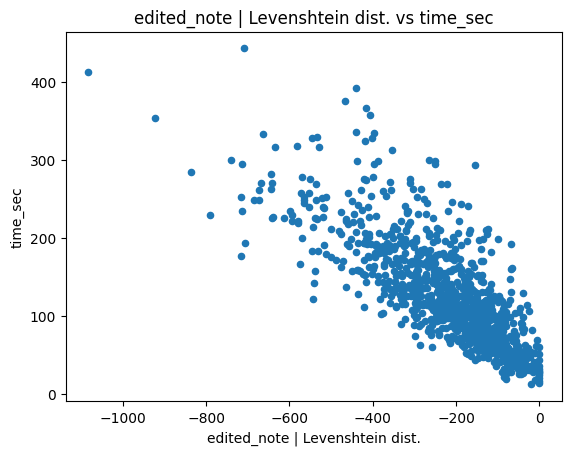

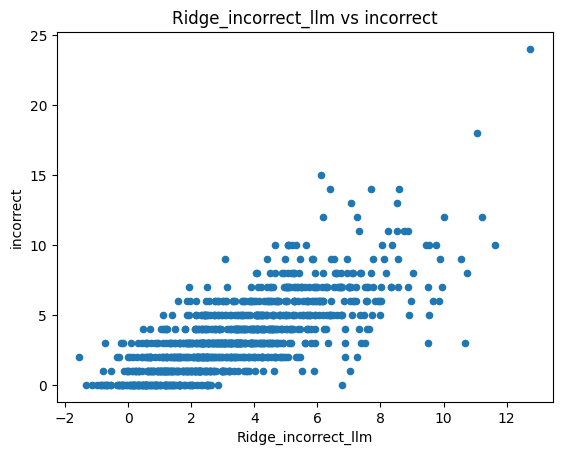

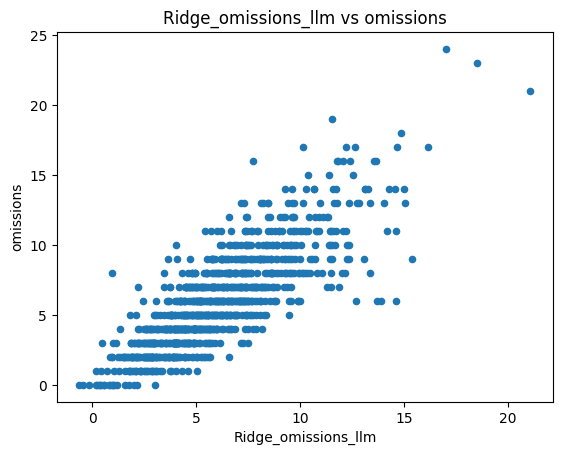

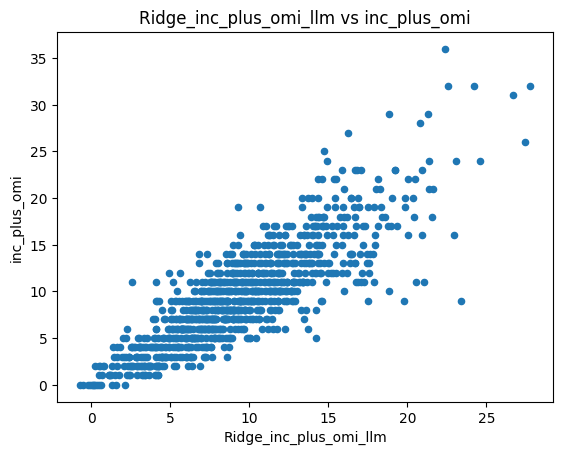

In [13]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
